In [94]:
from empath import Empath
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import re

In [7]:
# load in data
df = pd.read_csv('new_clean_output.csv',index_col = 0)
bodies = df['Body'].values

In [37]:
# number of emails
df.shape[0]

12016

In [99]:
# correct lines
re_body = re.compile(r"\'(.*?)\'")

bodies_in_a_line = []
for body in bodies:
    body_in_a_line = ''
    lines = re.findall(re_body, body)
    for line in lines:
        body_in_a_line = body_in_a_line+' '+line
    bodies_in_a_line.append(body_in_a_line)

In [12]:
# load empath tagger
lexicon = Empath()

In [152]:
# print out all the category names and the total number of category
keys = list(lexicon.analyze('a', normalize=False).keys()) # categories=["violence"]
print(keys)
print(len(keys))

['help', 'office', 'dance', 'money', 'wedding', 'domestic_work', 'sleep', 'medical_emergency', 'cold', 'hate', 'cheerfulness', 'aggression', 'occupation', 'envy', 'anticipation', 'family', 'vacation', 'crime', 'attractive', 'masculine', 'prison', 'health', 'pride', 'dispute', 'nervousness', 'government', 'weakness', 'horror', 'swearing_terms', 'leisure', 'suffering', 'royalty', 'wealthy', 'tourism', 'furniture', 'school', 'magic', 'beach', 'journalism', 'morning', 'banking', 'social_media', 'exercise', 'night', 'kill', 'blue_collar_job', 'art', 'ridicule', 'play', 'computer', 'college', 'optimism', 'stealing', 'real_estate', 'home', 'divine', 'sexual', 'fear', 'irritability', 'superhero', 'business', 'driving', 'pet', 'childish', 'cooking', 'exasperation', 'religion', 'hipster', 'internet', 'surprise', 'reading', 'worship', 'leader', 'independence', 'movement', 'body', 'noise', 'eating', 'medieval', 'zest', 'confusion', 'water', 'sports', 'death', 'healing', 'legend', 'heroic', 'celebr

In [157]:
# an example email
bodies_in_a_line[200]

'  Commissioner Mustian,  I would like to schedule some time to meet with you over the next couple weeks to discuss the small business credit initiative. Attached is a brief powerpoint that we have presented to the Targeted Issue Committee on Economic Development as well as the County Commission.  Please let me know what times will work for you.  I also would love to get your thoughts on the Blueprint extension.  Thanks and have a great weekend!       Kim Rivers, Principal e kim@inkbridge.net c 850.508.0261 f 850.576.9162    Local Small Business Credit Initiative  OBJECTIVE:  CREATE AN ECONOMIC DEVELOPMENT TOOL THAT  GIVES SMALL BUSINESSES  IN TALLAHASSEE A COMPETITIVE  ADVANTAGE  Local Small Business Credit Initiative  LEVERAGING FEDERAL AND STATE PROGRAMS   Achieve maximum incentive for the small business owner   Risk to the local government is mitigated by  Federal SBA Loan and State Guarantee Programs  Local Small Business Credit Initiative  PROGRAM MECHANICS   Local Government Gua

In [158]:
# an example output from the empath 
print(lexicon.analyze(bodies_in_a_line[200], normalize=False))

{'help': 1.0, 'office': 1.0, 'dance': 0.0, 'money': 7.0, 'wedding': 0.0, 'domestic_work': 0.0, 'sleep': 0.0, 'medical_emergency': 0.0, 'cold': 0.0, 'hate': 0.0, 'cheerfulness': 0.0, 'aggression': 0.0, 'occupation': 1.0, 'envy': 0.0, 'anticipation': 0.0, 'family': 0.0, 'vacation': 0.0, 'crime': 0.0, 'attractive': 1.0, 'masculine': 1.0, 'prison': 0.0, 'health': 0.0, 'pride': 0.0, 'dispute': 1.0, 'nervousness': 0.0, 'government': 3.0, 'weakness': 0.0, 'horror': 0.0, 'swearing_terms': 0.0, 'leisure': 0.0, 'suffering': 0.0, 'royalty': 0.0, 'wealthy': 2.0, 'tourism': 0.0, 'furniture': 0.0, 'school': 2.0, 'magic': 0.0, 'beach': 0.0, 'journalism': 0.0, 'morning': 0.0, 'banking': 4.0, 'social_media': 0.0, 'exercise': 0.0, 'night': 0.0, 'kill': 0.0, 'blue_collar_job': 0.0, 'art': 0.0, 'ridicule': 0.0, 'play': 1.0, 'computer': 0.0, 'college': 1.0, 'optimism': 2.0, 'stealing': 0.0, 'real_estate': 4.0, 'home': 0.0, 'divine': 0.0, 'sexual': 0.0, 'fear': 0.0, 'irritability': 0.0, 'superhero': 0.0, 'b

In [107]:
# apply empath to our emails
empath_counts = np.zeros((df.shape[0], len(keys)))
for idx,body in enumerate(tqdm_notebook(bodies_in_a_line)):
    result = lexicon.analyze(body.lower(), normalize=False)
    for jdx,key in enumerate(keys):
        empath_counts[idx,jdx] = result[key]

In [111]:
# apply empath to our emails
empath_counts_normed = np.zeros((df.shape[0], len(keys)))
for idx,body in enumerate(tqdm_notebook(bodies_in_a_line)):
    result = lexicon.analyze(body.lower(), normalize=True)
    try:
        for jdx,key in enumerate(keys):
            empath_counts_normed[idx,jdx] = result[key]
    except:
        continue

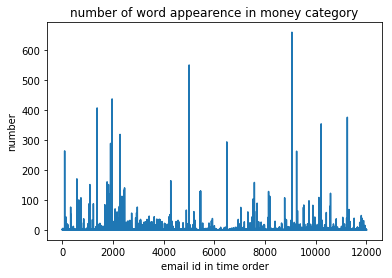

In [150]:
# index 3 corresponds to the category money
# plot the number of word appearence related to money 
category_index = 3
plt.plot(empath_counts[:,categoryo_index])
plt.title('number of word appearence in {} category'.format(keys[category_index]))
plt.xlabel('email id in time order')
plt.ylabel('number')
plt.show()

In [149]:
# get the email that has biggest number in category money
print(empath_counts[:,categoryo_index].argmax())
print(bodies_in_a_line[9065])

9065
   Paige, Per you request, please find attached the DIA monthly reports for fiscal year 2016(October 2015-May 2016). I will forward to you from this point forward.  If you need more information, please let me know.  Im new at this but I will get you what you need.  Thanks, Angie  Fund Account Descr  Budget Period Revenue Budget Revenue Recognized Over/-Under Budget  850 850 850  311100 345901 DIA Marketplace 361001  Ad Valorem Property Tax FY2016 FY2016 FY2016  Interest      203,200.00 150,000.00 4,500.00     -  463.64 46,884.00      (202,736.36) (103,116.00) (4,500.00)  Fund Dept  Account Major Account Descr  Budget Period Amended Budget PreEncumbrance Encumbrance Expenses Avail Budget  850 850 850 850 850 850 850 850 850 850 850 850 850  320103 511000 320103 511300 320103 512400 320103 515000 320103 515100 320103 515600 320103 516000 320103 516020 320103 516100 320103 525010 320103 525020 320103 525030 320103 631000  510000 510000 510000 510000 510000 510000 510000 510000 510000

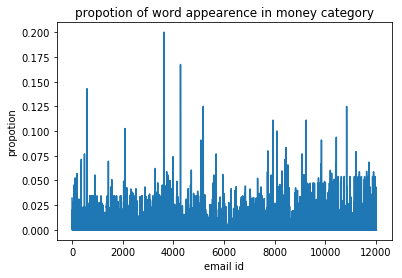

In [151]:
# plot the propotion of word appearence related to money 
category_index = 3
plt.plot(empath_counts_normed[:,categoryo_index])
plt.title('propotion of word appearence in {} category'.format(keys[category_index]))
plt.xlabel('email id')
plt.ylabel('propotion')
plt.show()

In [146]:
# get the email that has biggest propotion in category money
print(empath_counts_normed[:,categoryo_index].argmax())
print(bodies_in_a_line[3634])

3634
  Allie, The cost is 18. 
